# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = y_train.size

# TODO: Number of testing examples.
n_test = y_test.size

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0: Speed limit (20km/h)
1: Speed limit (30km/h)
2: Speed limit (50km/h)
3: Speed limit (60km/h)
4: Speed limit (70km/h)
5: Speed limit (80km/h)
6: End of speed limit (80km/h)
7: Speed limit (100km/h)
8: Speed limit (120km/h)
9: No passing
10: No passing for vechiles over 3.5 metric tons
11: Right-of-way at the next intersection
12: Priority road
13: Yield
14: Stop
15: No vechiles
16: Vechiles over 3.5 metric tons prohibited
17: No entry
18: General caution
19: Dangerous curve to the left
20: Dangerous curve to the right
21: Double curve
22: Bumpy road
23: Slippery road
24: Road narrows on the right
25: Road work
26: Traffic signals
27: Pedestrians
28: Children crossing
29: Bicycles crossing
30: Beware of ice/snow
31: Wild animals crossing
32: End of all speed and passing limits
33: Turn right ahead
34: Turn left ahead
35: Ahead only
36: Go straight or right
37: Go straight or left
38: Keep right
39: Keep left
40: Roundabout mandatory
41: End of no passing
42: End of no passing by vechi

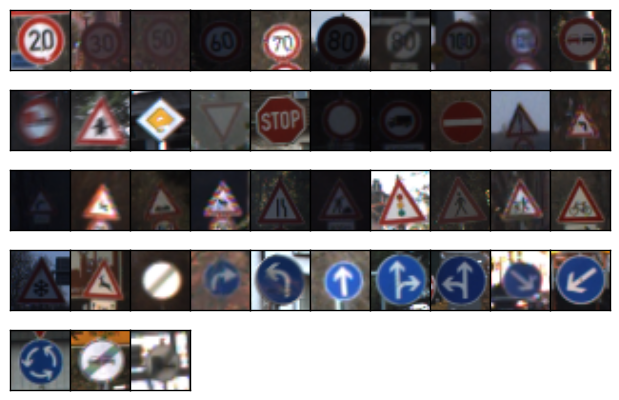

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

with open('signnames.csv', 'r') as f:
    class_names = dict(csv.reader(f))
        
samples = [X_train[np.random.choice(np.where(y_train==i)[0])] for i in range(n_classes)]

for i in range(n_classes):
    print("%i: %s" % (i, class_names[str(i)]))
    
def plot_grid(rows, cols, imgs):
    gs = gridspec.GridSpec(rows, cols, top=1., bottom=0., right=1., left=0., hspace=0.,
        wspace=0.)
    
    for i in range(rows):
        for j in range(cols):
            cnt = i*cols + j
            if cnt >= len(imgs):
                break
            ax = plt.subplot(gs[i,j])
            ax.imshow(imgs[cnt], cmap="gray")
            ax.set_xticks([])
            ax.set_yticks([])
            
plot_grid(5, 10, samples)
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

10681


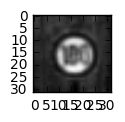

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

random.seed()

def preprocess(data):
    result = np.ndarray(data.shape[0:3])
    for i in range(len(data)):
        values = cv2.cvtColor(data[i, :, :, :], cv2.COLOR_BGR2GRAY)
        result[i, :, :] = (values - np.min(values)) / (np.max(values) - np.min(values))
    res = np.array(result)
    return (res - np.min(res)) / (np.max(res) - np.min(res))

X_train_processed = np.reshape(preprocess(X_train), [len(X_train), 32, 32, 1])
index = random.randint(0, len(X_train))
print(index)
image = X_train_processed[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The images were converted to grayscale, and the both a local normalisation and a global normalisation was applied, as suggested in the Sermanet paper. I initially tried extracting the Y component as suggested in the paper, but that seemd to yield worse results, both from an observation of the resulting images and from the network performance.

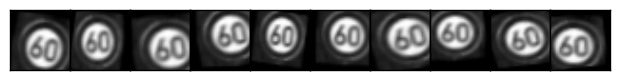

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def random_image_transform(img):
    ang_range = 20
    trans_range = 10
    shear_range = 5
    
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

index = random.randint(0, len(X_train_processed))
src = X_train_processed[index]

transformed = [random_image_transform(src) for i in range(10)]

plot_grid(1, 10, transformed)

(39209, 32, 32, 3)
(39209,)


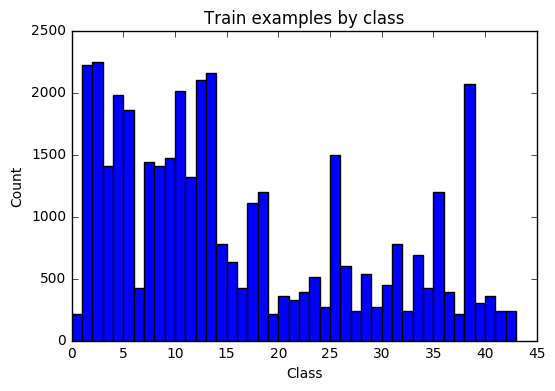

mean: 911 max:  2250


In [6]:
print(X_train.shape)
print(y_train.shape)

class_counts = [np.count_nonzero(y_train == i) for i in range(n_classes)]

index = np.arange(np.shape(class_counts)[0])
plt.bar(index, class_counts, 1)
plt.title('Train examples by class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

mean_class_count = int(np.average(class_counts))
max_class_count = int(np.max(class_counts))
print('mean:', mean_class_count, 'max: ', max_class_count)


Augmenting  0
Augmenting  1
Augmenting  2
Augmenting  3
Augmenting  4
Augmenting  5
Augmenting  6
Augmenting  7
Augmenting  8
Augmenting  9
Augmenting  10
Augmenting  11
Augmenting  12
Augmenting  13
Augmenting  14
Augmenting  15
Augmenting  16
Augmenting  17
Augmenting  18
Augmenting  19
Augmenting  20
Augmenting  21
Augmenting  22
Augmenting  23
Augmenting  24
Augmenting  25
Augmenting  26
Augmenting  27
Augmenting  28
Augmenting  29
Augmenting  30
Augmenting  31
Augmenting  32
Augmenting  33
Augmenting  34
Augmenting  35
Augmenting  36
Augmenting  37
Augmenting  38
Augmenting  39
Augmenting  40
Augmenting  41
Augmenting  42


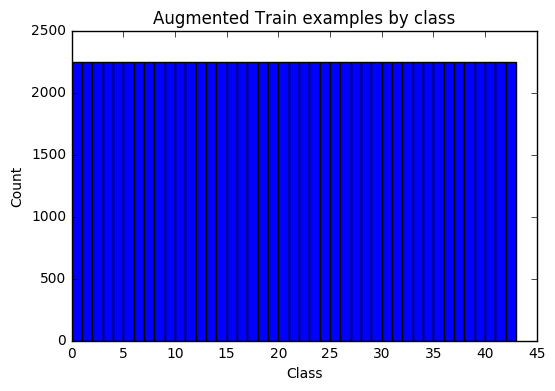

mean: 2250 max:  2250


In [7]:
target_size = max_class_count

source = X_train_processed
X_train_augmented = []
y_train_augmented = []

for c in range(n_classes):
    C_train = source[np.where(y_train==c)]
    count = len(C_train)
    print('Augmenting ', c)
    if target_size > count:
        additional = [
            np.reshape(random_image_transform(C_train[np.random.randint(count)]), [32, 32, 1])
            for n in range(target_size - count)
        ]
        C_train = np.append(C_train, additional, axis=0)
    #if count > mean_class_count:
    #    idx = np.random.randint(count, size=count-mean_class_count)
    #    C_train[idx] = np.array([np.reshape(random_image_transform(C_train[i]), [32, 32, 1]) for i in idx])
    X_train_augmented = X_train_augmented + C_train.tolist()
    y_train_augmented = y_train_augmented + [c for i in range(C_train.shape[0])]

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


class_counts = [np.count_nonzero(y_train_augmented == i) for i in range(n_classes)]

index = np.arange(np.shape(class_counts)[0])
plt.bar(index, class_counts, 1)
plt.title('Augmented Train examples by class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

mean_class_count = int(np.average(class_counts))
max_class_count = int(np.max(class_counts))
print('mean:', mean_class_count, 'max: ', max_class_count)
    

In [8]:
print(X_train_augmented.shape)
print(y_train_augmented.shape)

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train1, X_validation, y_train1, y_validation = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=0)
#X_train1, X_validation, y_train1, y_validation = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=0)

print(X_train1.shape)
print(X_validation.shape)



(96750, 32, 32, 1)
(96750,)
(77400, 32, 32, 1)
(19350, 32, 32, 1)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I augmented the initial set by creating images in the underrepresented classes by applying random rotation, translation, and shear (the starting point for the image transform code was borrowed from a post on the class forums).

I also considered applying random mutations to the existing images in the overrepresented sets, but that didn't seem to provide better results. Given more time, I would try generating more training images as described in the sermanet paper.

From the test set the 20% of the examples was then selected as random to be used as validation set.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def SignRecognition(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    

    # Activation.
    
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32.
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # 

    # Layer 2: Convolutional. Output = 10x10x64.
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x64. Output = 1600.
    
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 800.
    
    global fc1_W
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 800), mean=mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 400.
    
    global fc2_W
    
    fc2_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean=mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(400))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    
    fc2   = tf.nn.relu(fc2)
    fc2   = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 400. Output = 43.
    
    global fc3_W
    
    fc3_W = tf.Variable(tf.truncated_normal(shape=(400, n_classes), mean=mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

My final architecture tracks closely the LeNet architecture, with an increase in the number of features.

* 1st layer (convolution + pooling): 
  - 5x5 convolution, 32 filters
  - ReLu activation
  - Max Pooling of size 2, stride 2
* 2nd layer (convolution + pooling):
  - 5x5 convolution, 64 filters
  - ReLu activation
  - Max Pooling of size 2, stride 2
* 3rd layer (fully connected):
  - 1600 to 800
  - ReLu activation
  - Dropout with 0.5 probability
* 4th layer (fully connected):
  - 800 to 400
  - ReLu activation
  - Dropout with 0.5 probability
* 5th layer (fully connected):
  - 400 to 43
  - ReLu activation


**Answer:**

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

rate = 0.001

logits = SignRecognition(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) 
# + (tf.nn.l2_loss(t=fc1_W) + tf.nn.l2_loss(t=fc2_W) + tf.nn.l2_loss(t=fc3_W)) * 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# config = tf.ConfigProto(
#     device_count = {'GPU': 0}
# )

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train1)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train1, y_train1 = shuffle(X_train1, y_train1)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train1[offset:end], y_train1[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.3})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.569

EPOCH 2 ...
Validation Accuracy = 0.801

EPOCH 3 ...
Validation Accuracy = 0.897

EPOCH 4 ...
Validation Accuracy = 0.916

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.956

EPOCH 7 ...
Validation Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.972

EPOCH 11 ...
Validation Accuracy = 0.977

EPOCH 12 ...
Validation Accuracy = 0.974

EPOCH 13 ...
Validation Accuracy = 0.978

EPOCH 14 ...
Validation Accuracy = 0.981

EPOCH 15 ...
Validation Accuracy = 0.980

Model saved


In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(np.reshape(preprocess(X_test), [len(X_test), 32, 32, 1]), y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.958


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam optimizer, with a batch size of 128 and 15 epochs, and a learning rate of 0.001.

The network was initialized with weights following a truncated normal distribution with mean 0 and sigma 0.1. The dropout probability for the fully connected layer was set to 0.3.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My process was essentially one of trial and error. I started with a LeNet architecture as described in the course; I then tried several alternative architectures, including the sermanet architecture, and various inception approaches combining different levels of convolutions into the input to the fully connected layer. Frustratingly, none have yielded better results than just increasing the number of features of the initial layer. 

Eventually, I settled on the current architecture as it is the one that yielded the best results over the training set. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Prediction: 17 - No entry
Prediction: 18 - General caution
Prediction: 13 - Yield
Prediction: 14 - Stop
Prediction: 22 - Bumpy road
Prediction: 11 - Right-of-way at the next intersection
Prediction: 13 - Yield
Prediction: 17 - No entry
Prediction: 25 - Road work
Prediction: 9 - No passing
Prediction: 4 - Speed limit (70km/h)
Prediction: 11 - Right-of-way at the next intersection
Prediction: 40 - Roundabout mandatory


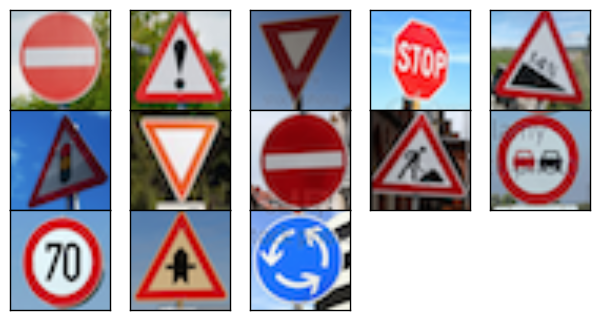

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

img_cnt = 13
images = []
for n in range(img_cnt):
    img = cv2.imread('signs/'+str(n+1)+'.png')

    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    images.append(np.asarray(img))

plot_grid(4, 5, images)

# normalize new test data
test_images_preprocessed = preprocess(np.array(images))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    predictions = sess.run(tf.nn.softmax(logits), feed_dict={x: test_imgs_gray, keep_prob: 1})
    
    
for i in range(no_of_imgs):
    print('Prediction: {} - {}'.format(test_prediction[i], class_names[str(test_prediction[i])]))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.